In [1]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/jamezahidalgo/proyectoCienciaDatos/main/data/DATA_PCD.xlsx

--2024-11-30 16:35:30--  https://raw.githubusercontent.com/jamezahidalgo/proyectoCienciaDatos/main/data/DATA_PCD.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5507296 (5.3M) [application/octet-stream]
Saving to: ‘DATA_PCD.xlsx’

DATA_PCD.xlsx       100%[===================>]   5.25M  --.-KB/s    in 0.1s    

2024-11-30 16:35:31 (52.8 MB/s) - ‘DATA_PCD.xlsx’ saved [5507296/5507296]



In [267]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error

from sklearn.pipeline import Pipeline
from operator import itemgetter
from collections import Counter


In [3]:
data = pd.read_excel("DATA_PCD.xlsx", sheet_name="data2021")
data.shape

(16113, 59)

In [ ]:
data.head(6)

,AÑO_SEMESTRE_MATRICULA,AÑO_MATRICULA,SEMESTRE_MATRICULA,FECHA_MATRICULA,TIPO_MATRICULA,CODIGO_CARRERA_COMPLETO,CODIGO_CARRERA_PARCIAL,NOMBRE_CARRERA,JORNADA,RUT_CON_DV,...,E1,E2,SED_CODIGO_ALUM,CARRERA_CODIGO_ALUMNO,PROM_CALIFICACIONES,PROM_EXAMEN,NOTA_FINAL,RAMO_CODIGO_MALLA,DESCRIPCION_RAMO_MALLA,EXAMEN_REPETICION
0,2021-1,2021,1,2021-03-04,Continuidad,1444707,447,Analista Programador Computacional,D,200146638,...,3.5,0.0,105,447,3.5,3.5,3.5,PTY4477,Portafolio De Titulo,0.0
1,2021-1,2021,1,2021-03-09,Continuidad,1444707,447,Analista Programador Computacional,D,18386825K,...,0.0,0.0,105,447,0.0,0.0,0.0,PTY4477,Portafolio De Titulo,0.0
2,2021-1,2021,1,2021-02-02,Admisión Especial,1444707,447,Analista Programador Computacional,D,195112142,...,0.0,0.0,105,447,0.0,0.0,0.0,PTY4477,Portafolio De Titulo,0.0
3,2021-1,2021,1,2021-01-08,Continuidad,1444706,447,Analista Programador Computacional,D,193868649,...,4.9,0.0,105,447,4.9,4.9,4.9,PTY4477,Portafolio De Titulo,0.0
4,2021-1,2021,1,2020-12-01,Continuidad,1444707,447,Analista Programador Computacional,D,206950609,...,3.5,0.0,105,447,3.5,3.5,3.5,PTY4477,Portafolio De Titulo,0.0
5,2021-1,2021,1,2021-01-05,Continuidad,1444707,447,Analista Programador Computacional,D,195776466,...,0.0,0.0,105,447,0.0,0.0,0.0,PTY4477,Portafolio De Titulo,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16113 entries, 0 to 16112
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AÑO_SEMESTRE_MATRICULA    16113 non-null  object        
 1   AÑO_MATRICULA             16113 non-null  int64         
 2   SEMESTRE_MATRICULA        16113 non-null  int64         
 3   FECHA_MATRICULA           16113 non-null  datetime64[ns]
 4   TIPO_MATRICULA            16113 non-null  object        
 5   CODIGO_CARRERA_COMPLETO   16113 non-null  int64         
 6   CODIGO_CARRERA_PARCIAL    16113 non-null  int64         
 7   NOMBRE_CARRERA            16113 non-null  object        
 8   JORNADA                   16113 non-null  object        
 9   RUT_CON_DV                16113 non-null  object        
 10  SEXO                      16113 non-null  object        
 11  FECHA_NACIMIENTO          16113 non-null  datetime64[ns]
 12  ESTADO_CIVIL      

In [4]:
data = data.drop(['AÑO_PSU', 'PROM_PSU'], axis=1)
data.shape

(16113, 57)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16113 entries, 0 to 16112
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AÑO_SEMESTRE_MATRICULA    16113 non-null  object        
 1   AÑO_MATRICULA             16113 non-null  int64         
 2   SEMESTRE_MATRICULA        16113 non-null  int64         
 3   FECHA_MATRICULA           16113 non-null  datetime64[ns]
 4   TIPO_MATRICULA            16113 non-null  object        
 5   CODIGO_CARRERA_COMPLETO   16113 non-null  int64         
 6   CODIGO_CARRERA_PARCIAL    16113 non-null  int64         
 7   NOMBRE_CARRERA            16113 non-null  object        
 8   JORNADA                   16113 non-null  object        
 9   RUT_CON_DV                16113 non-null  object        
 10  SEXO                      16113 non-null  object        
 11  FECHA_NACIMIENTO          16113 non-null  datetime64[ns]
 12  ESTADO_CIVIL      

# Tratamiento data índice

In [5]:
data_indice = data.iloc[:,:25]
data_indice.shape

(16113, 25)

In [ ]:
data_indice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16113 entries, 0 to 16112
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   AÑO_SEMESTRE_MATRICULA   16113 non-null  object        
 1   AÑO_MATRICULA            16113 non-null  int64         
 2   SEMESTRE_MATRICULA       16113 non-null  int64         
 3   FECHA_MATRICULA          16113 non-null  datetime64[ns]
 4   TIPO_MATRICULA           16113 non-null  object        
 5   CODIGO_CARRERA_COMPLETO  16113 non-null  int64         
 6   CODIGO_CARRERA_PARCIAL   16113 non-null  int64         
 7   NOMBRE_CARRERA           16113 non-null  object        
 8   JORNADA                  16113 non-null  object        
 9   RUT_CON_DV               16113 non-null  object        
 10  SEXO                     16113 non-null  object        
 11  FECHA_NACIMIENTO         16113 non-null  datetime64[ns]
 12  ESTADO_CIVIL             15833 n

In [ ]:
data_indice.RUT_CON_DV.describe()

,RUT_CON_DV
count,16113
unique,954
top,21276258K
freq,40


In [6]:
columnas = data_indice.columns[9:]
columnas = columnas.difference(['SEMESTRE_INGRESO', 'TIPO_INGRESO'])
data_indice = data_indice[columnas]

In [7]:
len(data_indice.RUT_CON_DV.unique())

954

In [8]:
# Agrupar por todas las columnas y contar las ocurrencias
repeticiones = data_indice.groupby("RUT_CON_DV").size()

# Filtrar las filas que se repiten
repeticiones_mayor_1 = repeticiones[repeticiones > 1]

# Convertir el resultado a DataFrame para una visualización más clara (opcional)
repeticiones_df = repeticiones_mayor_1.reset_index(name='frecuencia')

repeticiones_df

,RUT_CON_DV,frecuencia
0,122079007,16
1,152239025,20
2,152897774,21
3,152898169,12
4,156139564,11
...,...,...
922,21465508K,23
923,21504324K,13
924,21673677K,13
925,21699454K,13


In [9]:
data_indice_unica = []
for rut, grupo in data_indice.groupby("RUT_CON_DV"):
    data_indice_unica.append(grupo.iloc[0])

data_indice_unica = pd.DataFrame(data_indice_unica)

In [10]:
data_indice_unica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 1066 to 11745
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   AÑO_INGRESO       954 non-null    int64         
 1   COMUNA            954 non-null    object        
 2   CONDICION         954 non-null    object        
 3   EGRESO_EM         939 non-null    float64       
 4   ESTADO_CIVIL      937 non-null    object        
 5   FECHA_NACIMIENTO  954 non-null    datetime64[ns]
 6   NACIONALIDAD      954 non-null    object        
 7   NOMBRE_COLEGIO    939 non-null    object        
 8   PROMEDIO_LEM      935 non-null    float64       
 9   REGION            954 non-null    object        
 10  RUT_CON_DV        954 non-null    object        
 11  SEXO              954 non-null    object        
 12  TIPO COLEGIO      936 non-null    object        
 13  TIPO ESTUDIO      917 non-null    object        
dtypes: datetime64[ns](1), floa

## Eliminación de nulos

In [11]:
data_indice_unica.dropna(inplace=True)
data_indice_unica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 1066 to 11745
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   AÑO_INGRESO       909 non-null    int64         
 1   COMUNA            909 non-null    object        
 2   CONDICION         909 non-null    object        
 3   EGRESO_EM         909 non-null    float64       
 4   ESTADO_CIVIL      909 non-null    object        
 5   FECHA_NACIMIENTO  909 non-null    datetime64[ns]
 6   NACIONALIDAD      909 non-null    object        
 7   NOMBRE_COLEGIO    909 non-null    object        
 8   PROMEDIO_LEM      909 non-null    float64       
 9   REGION            909 non-null    object        
 10  RUT_CON_DV        909 non-null    object        
 11  SEXO              909 non-null    object        
 12  TIPO COLEGIO      909 non-null    object        
 13  TIPO ESTUDIO      909 non-null    object        
dtypes: datetime64[ns](1), floa

## Determina la edad al momento de ingresar a la carrera

In [12]:
data_indice_unica['EDAD_INGRESO'] = data_indice_unica['AÑO_INGRESO'] - data_indice_unica['FECHA_NACIMIENTO'].dt.year

In [13]:
data_indice_unica.describe()

,AÑO_INGRESO,EGRESO_EM,FECHA_NACIMIENTO,PROMEDIO_LEM,EDAD_INGRESO
count,909.000000,909.000000,909,909.000000,909.000000
mean,2020.633663,2017.146315,1999-08-14 04:49:54.059405952,5.552475,21.544554
min,2013.000000,1986.000000,1972-06-05 00:00:00,4.500000,17.000000
25%,2019.000000,2015.000000,1997-09-24 00:00:00,5.300000,19.000000
50%,2021.000000,2018.000000,2000-04-05 00:00:00,5.500000,21.000000
75%,2022.000000,2020.000000,2002-03-24 00:00:00,5.800000,23.000000
max,2023.000000,2023.000000,2005-06-05 00:00:00,6.800000,48.000000
std,1.881691,3.593548,NaN,0.407105,3.180933


In [14]:
data_indice_unica.describe(include=np.object_)

,COMUNA,CONDICION,ESTADO_CIVIL,NACIONALIDAD,NOMBRE_COLEGIO,REGION,RUT_CON_DV,SEXO,TIPO COLEGIO,TIPO ESTUDIO
count,909,909,909,909,909,909,909,909,909,909
unique,76,2,4,2,323,13,909,2,4,4
top,Talcahuano,Inscrito,Soltero,Chilena,L.Mauricio Holchschild Del Ceat,Viii - Bio-Bio,122079007,Masculino,Particular Subvencionado,Cientifico Humanista
freq,107,904,896,904,29,822,1,806,484,497


## Análisis de variables

In [ ]:
data_indice_unica['TIPO COLEGIO'].unique()

array(['Municipal', 'Particular Subvencionado', 'Particular',
       'Organizaciones del Gobierno'], dtype=object)

In [ ]:
data_indice_unica.groupby(['TIPO COLEGIO', 'TIPO ESTUDIO']).size()

TIPO COLEGIO                 TIPO ESTUDIO        
Municipal                    Cientifico Humanista    212
                             Educacion Básica         15
                             Tecnico Profesional     163
Organizaciones del Gobierno  Cientifico Humanista      1
Particular                   Cientifico Humanista     34
Particular Subvencionado     Cientifico Humanista    250
                             Educacion Basica         26
                             Tecnico Profesional     208
dtype: int64

In [15]:
data_indice_unica.RUT_CON_DV.nunique()

909

In [16]:
data_indice_unica.query("RUT_CON_DV == 122079007") #122079007 160090723

,AÑO_INGRESO,COMUNA,CONDICION,EGRESO_EM,ESTADO_CIVIL,FECHA_NACIMIENTO,NACIONALIDAD,NOMBRE_COLEGIO,PROMEDIO_LEM,REGION,RUT_CON_DV,SEXO,TIPO COLEGIO,TIPO ESTUDIO,EDAD_INGRESO
1066,2020,Talcahuano,Inscrito,1986.0,Soltero,1972-06-05,Chilena,L.De Niñas,5.0,Viii - Bio-Bio,122079007,Femenino,Municipal,Cientifico Humanista,48


In [ ]:
data_indice_unica.query("RUT_CON_DV == 172225845") #122079007 160090723

In [ ]:
# Identificar las columnas que tienen diferencias para cada RUT_CON_DV
def detectar_columnas_diferentes(data, id_col):
    # Diccionario para guardar las columnas con diferencias por RUT_CON_DV
    diferencias = {}

    # Agrupar por el identificador único
    for rut, group in data.groupby(id_col):
        # Almacenar las columnas con diferencias
        columnas_diferentes = []
        for col in group.columns:
            if col != id_col:  # Ignorar la columna del identificador
                if group[col].nunique() > 1:  # Verificar si hay más de un valor único
                    columnas_diferentes.append(col)
        diferencias[rut] = columnas_diferentes

    return diferencias

# Aplicar la función
diferencias_por_rut = detectar_columnas_diferentes(data_indice, 'RUT_CON_DV')

# Guardar el resultado
archivo = open("conflictos.txt", 'w')
for rut, columnas in diferencias_por_rut.items():
  if (len(columnas) > 0):
    archivo.write(f"RUT {rut} tiene diferencias en las columnas: {columnas}")
archivo.close()

RUT 122079007 tiene diferencias en las columnas: ['NOMBRE_COLEGIO', 'TIPO COLEGIO']
RUT 152239025 tiene diferencias en las columnas: ['NOMBRE_COLEGIO']
RUT 156139564 tiene diferencias en las columnas: ['NOMBRE_COLEGIO']
RUT 160090723 tiene diferencias en las columnas: ['COMUNA', 'REGION']
RUT 172225845 tiene diferencias en las columnas: ['NOMBRE_COLEGIO', 'TIPO ESTUDIO']
RUT 172829619 tiene diferencias en las columnas: ['NOMBRE_COLEGIO']
RUT 173491417 tiene diferencias en las columnas: ['NOMBRE_COLEGIO']
RUT 176135999 tiene diferencias en las columnas: ['COMUNA']
RUT 176324848 tiene diferencias en las columnas: ['NOMBRE_COLEGIO', 'TIPO ESTUDIO']
RUT 178449516 tiene diferencias en las columnas: ['COMUNA', 'TIPO COLEGIO']
RUT 178617591 tiene diferencias en las columnas: ['NOMBRE_COLEGIO']
RUT 180682473 tiene diferencias en las columnas: ['NOMBRE_COLEGIO', 'TIPO COLEGIO', 'TIPO ESTUDIO']
RUT 180691553 tiene diferencias en las columnas: ['NOMBRE_COLEGIO']
RUT 180830782 tiene diferencias en

In [ ]:
data_indice_unica.groupby("RUT_CON_DV").size()

,0
RUT_CON_DV,
122079007,1
152239025,1
152897774,1
152898169,1
156139564,1
...,...
21465508K,1
21504324K,1
21673677K,1


# Tratamiento data académica

In [63]:
data_academica = data.iloc[:,25:]
data_academica.shape

(16113, 32)

In [64]:
data_academica.columns

Index(['CRR_CODIGO', 'CARRERA_NOMBRE', 'JORNADA.1', 'CODIGO_RAMO',
       'DESCRIPCION_RAMO', 'DEH_SECCION', 'ANO_ACADEMICO', 'DOM_SEMESTRE',
       'RUT_CON_DV.1', 'ESTADO_FINAL_RAMO', 'CANTIDAD_NOTAS_PARCIALES',
       'CANTIDAD_NOTAS_EXAMEN', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'E1', 'E2', 'SED_CODIGO_ALUM', 'CARRERA_CODIGO_ALUMNO',
       'PROM_CALIFICACIONES', 'PROM_EXAMEN', 'NOTA_FINAL', 'RAMO_CODIGO_MALLA',
       'DESCRIPCION_RAMO_MALLA', 'EXAMEN_REPETICION'],
      dtype='object')

In [65]:
data_academica = data_academica.rename(columns={'RUT_CON_DV.1': 'RUT_CON_DV'})

## Determina calidad de desertor

In [20]:
data_indice_unica.columns

Index(['AÑO_INGRESO', 'COMUNA', 'CONDICION', 'EGRESO_EM', 'ESTADO_CIVIL',
       'FECHA_NACIMIENTO', 'NACIONALIDAD', 'NOMBRE_COLEGIO', 'PROMEDIO_LEM',
       'REGION', 'RUT_CON_DV', 'SEXO', 'TIPO COLEGIO', 'TIPO ESTUDIO',
       'EDAD_INGRESO'],
      dtype='object')

In [21]:
data_academica.columns

Index(['CRR_CODIGO', 'CARRERA_NOMBRE', 'JORNADA.1', 'CODIGO_RAMO',
       'DESCRIPCION_RAMO', 'DEH_SECCION', 'ANO_ACADEMICO', 'DOM_SEMESTRE',
       'RUT_CON_DV', 'ESTADO_FINAL_RAMO', 'CANTIDAD_NOTAS_PARCIALES',
       'CANTIDAD_NOTAS_EXAMEN', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'E1', 'E2', 'SED_CODIGO_ALUM', 'CARRERA_CODIGO_ALUMNO',
       'PROM_CALIFICACIONES', 'PROM_EXAMEN', 'NOTA_FINAL', 'RAMO_CODIGO_MALLA',
       'DESCRIPCION_RAMO_MALLA', 'EXAMEN_REPETICION'],
      dtype='object')

In [47]:
# Adapta el tipo de dato del RUT
data_indice_unica['RUT_CON_DV'] = data_indice_unica['RUT_CON_DV'].astype("str")
data_academica['RUT_CON_DV'] = data_academica['RUT_CON_DV'].astype("str")

In [56]:
def es_desertor(data : pd.DataFrame, identificador : str):
  """

  Args:
    data: dataframe con la data académica
    identificador: rut del estudiante

  Returns: indicador lógico para saber si es desertor

  """
  # Determina el rango de años disponibles
  minimo, maximo = np.min(data.ANO_ACADEMICO), np.max(data.ANO_ACADEMICO)
  total = 0
  # Determina el total de semestres
  total_periodos = (maximo - minimo + 1)*2

  # Obtiene el primer filtro
  segundo_semestre = data.query(f"RUT_CON_DV == '{identificador}' and ANO_ACADEMICO == {minimo} and DOM_SEMESTRE == 2")
  esDesertor = len(segundo_semestre) == 0
  # Revisa el resto de los períodos
  for periodo in range(minimo+1, maximo+1):
    for semestre in range(1,3):
      if semestre % 2 != 0:
        filtro_periodo_anterior = data.query(f"RUT_CON_DV == '{identificador}' and ANO_ACADEMICO == {periodo-1} and DOM_SEMESTRE == 2")
      else:
        filtro_periodo_anterior = data.query(f"RUT_CON_DV == '{identificador}' and ANO_ACADEMICO == {periodo} and DOM_SEMESTRE == 1")
      esDesertor = len(filtro_periodo_anterior) == 0
  return esDesertor

In [60]:
archivo_desertores = open("desertores.txt", 'w')
archivo_NO_desertores = open("no_desertores.txt", 'w')
print("Determinando desertores ...")
total_desertores, total_no_desertores = 0, 0
for estudiante in data_indice_unica.RUT_CON_DV.unique():
  if es_desertor(data_academica, estudiante):
    archivo_desertores.write(estudiante+"\n")
    total_desertores += 1
  else:
    archivo_NO_desertores.write(estudiante+"\n")
    total_no_desertores += 1
archivo_desertores.close()
archivo_NO_desertores.close()
print("Desertores encontrados. Ver archivos")
print(f"Hay {total_desertores} desertores y {total_no_desertores} NO desertores")
print("Proceso correcto?", "SI" if len(data_indice_unica.RUT_CON_DV.unique()) == (total_no_desertores + total_desertores) else "NO")

Determinando desertores ...
Desertores encontrados. Ver archivos
Hay 357 desertores y 552 NO desertores
Proceso correcto? SI


In [61]:
data_indice_unica['desertor'] = data_indice_unica.RUT_CON_DV.apply(lambda r : es_desertor(data_academica, r))
data_indice_unica[['RUT_CON_DV', 'desertor']]

,RUT_CON_DV,desertor
1066,122079007,False
562,152239025,False
2003,152897774,False
11819,152898169,False
8331,156139564,False
...,...,...
5363,21465508K,False
11810,21504324K,False
10741,21673677K,False
11013,21699454K,False


In [62]:
data_indice_unica.groupby("desertor").size()

,0
desertor,
False,552
True,357


## Análisis de variables

In [ ]:
data_academica.DESCRIPCION_RAMO.describe()

,DESCRIPCION_RAMO
count,16113
unique,110
top,Programacion De Algoritmos
freq,616


In [ ]:
data_academica.PROM_EXAMEN.describe().T

,PROM_EXAMEN
count,16113.000000
mean,4.496754
std,2.326007
min,0.000000
25%,3.300000
50%,5.500000
75%,6.300000
max,7.000000


In [ ]:
data_academica.shape[0]/data_academica.RUT_CON_DV.nunique()/6

2.8149895178197064

In [ ]:
data_academica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16113 entries, 0 to 16112
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRR_CODIGO                16113 non-null  int64  
 1   CARRERA_NOMBRE            16113 non-null  object 
 2   JORNADA.1                 16113 non-null  object 
 3   CODIGO_RAMO               16113 non-null  object 
 4   DESCRIPCION_RAMO          16113 non-null  object 
 5   DEH_SECCION               16113 non-null  int64  
 6   ANO_ACADEMICO             16113 non-null  int64  
 7   DOM_SEMESTRE              16113 non-null  int64  
 8   RUT_CON_DV                16113 non-null  object 
 9   ESTADO_FINAL_RAMO         16113 non-null  object 
 10  CANTIDAD_NOTAS_PARCIALES  16111 non-null  float64
 11  CANTIDAD_NOTAS_EXAMEN     16111 non-null  float64
 12  C1                        16110 non-null  float64
 13  C2                        16110 non-null  float64
 14  C3    

In [ ]:
data_academica.describe()

,CRR_CODIGO,ANO_ACADEMICO,DOM_SEMESTRE,C1,C2,C3,NOTA_FINAL
count,16113.000000,16113.000000,16113.000000,16110.000000,16110.000000,16050.000000,16113.000000
mean,459.561224,2022.005834,1.480668,5.077412,5.006096,4.776336,4.650642
std,4.663728,0.817868,0.499642,1.831706,1.986042,2.190783,2.134321
min,447.000000,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,461.000000,2021.000000,1.000000,4.200000,4.000000,3.700000,4.000000
50%,461.000000,2022.000000,1.000000,5.600000,5.800000,5.600000,5.400000
75%,461.000000,2023.000000,2.000000,6.500000,6.500000,6.500000,6.200000
max,462.000000,2023.000000,2.000000,7.000000,7.000000,7.000000,7.000000


In [ ]:
data_academica.describe(include = np.object_)

,ESTADO_FINAL_RAMO
count,16113
unique,4
top,AR
freq,12316


## Selección de columnas para modelo de clasificación

In [88]:
data_academica_modelo = data_academica.drop(['CARRERA_NOMBRE', 'JORNADA.1', 'CODIGO_RAMO',
       'DESCRIPCION_RAMO', 'DEH_SECCION',
       'CANTIDAD_NOTAS_PARCIALES',
       'CANTIDAD_NOTAS_EXAMEN',
       'C4', 'C5', 'C6','C7','C8','C9','C10','E1',
       'E2',
       'SED_CODIGO_ALUM', 'CARRERA_CODIGO_ALUMNO', 'PROM_CALIFICACIONES',
       'PROM_EXAMEN',  'RAMO_CODIGO_MALLA',
       'DESCRIPCION_RAMO_MALLA', 'EXAMEN_REPETICION'], axis=1)
data_academica_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16113 entries, 0 to 16112
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CRR_CODIGO         16113 non-null  int64  
 1   ANO_ACADEMICO      16113 non-null  int64  
 2   DOM_SEMESTRE       16113 non-null  int64  
 3   RUT_CON_DV         16113 non-null  object 
 4   ESTADO_FINAL_RAMO  16113 non-null  object 
 5   C1                 16110 non-null  float64
 6   C2                 16110 non-null  float64
 7   C3                 16050 non-null  float64
 8   NOTA_FINAL         16113 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.1+ MB


## Tratamiento de nulos de la data del modelo






In [89]:
# Contar valores nulos por columna
nulos_por_columna = data_academica_modelo.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0].index.tolist()
print("Columnas con nulos:", columnas_con_nulos)

Columnas con nulos: ['C1', 'C2', 'C3']


In [90]:
nulos_por_columna

,0
CRR_CODIGO,0
ANO_ACADEMICO,0
DOM_SEMESTRE,0
RUT_CON_DV,0
ESTADO_FINAL_RAMO,0
C1,3
C2,3
C3,63
NOTA_FINAL,0


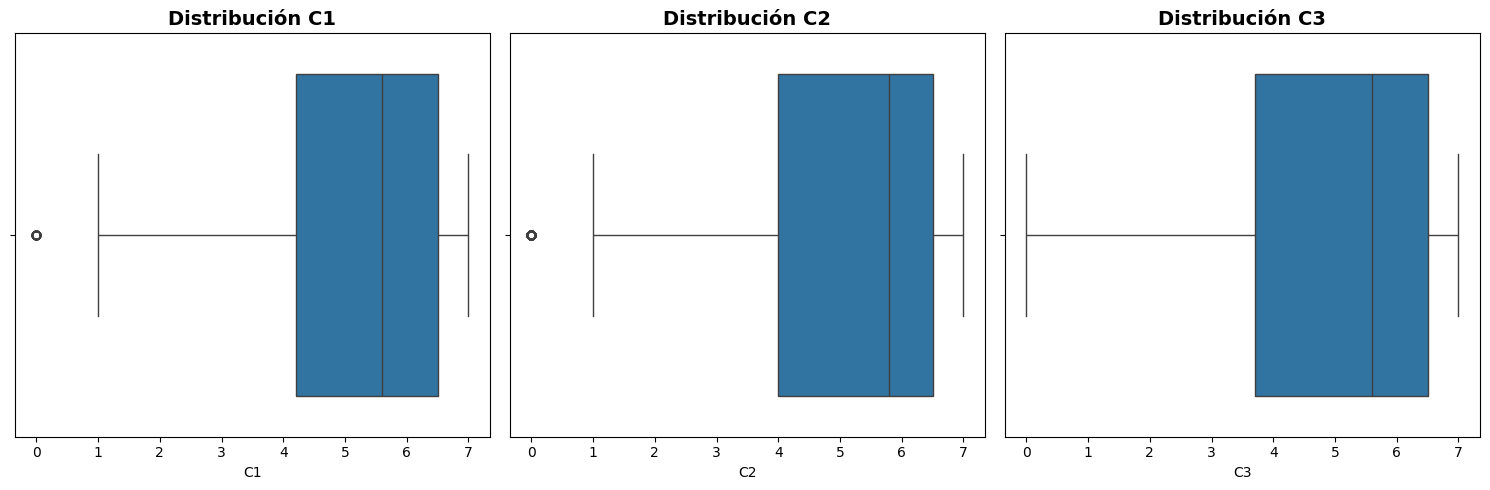

In [75]:
# Crear subplots en una fila
fig, axes = plt.subplots(1, len(columnas_con_nulos), figsize=(15, 5))

# Generar un gráfico de caja para cada columna
for i, col in enumerate(columnas_con_nulos):
    sns.boxplot(data=data_academica_modelo, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución {col}', fontsize=14, fontweight='bold')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()

In [76]:
data_academica_modelo[columnas_con_nulos].describe()

,C1,C2,C3
count,16110.000000,16110.000000,16050.000000
mean,5.077412,5.006096,4.776336
std,1.831706,1.986042,2.190783
min,0.000000,0.000000,0.000000
25%,4.200000,4.000000,3.700000
50%,5.600000,5.800000,5.600000
75%,6.500000,6.500000,6.500000
max,7.000000,7.000000,7.000000


In [91]:
registros_con_nulos = data_academica_modelo[data_academica_modelo.isnull().any(axis=1)]
registros_con_nulos


,CRR_CODIGO,ANO_ACADEMICO,DOM_SEMESTRE,RUT_CON_DV,ESTADO_FINAL_RAMO,C1,C2,C3,NOTA_FINAL
13757,447,2023,2,206979259,RI,1.0,1.0,NaN,0.0
13758,447,2023,2,206128313,RI,1.0,1.5,NaN,0.0
13759,447,2023,2,18411304K,RI,1.0,1.0,NaN,0.0
13770,447,2023,2,214566206,RI,1.0,1.0,NaN,0.0
13771,447,2023,2,19510431K,RI,1.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
15894,461,2023,2,205140794,RI,1.0,1.0,NaN,0.0
15895,461,2023,2,189624395,RI,3.1,2.8,NaN,0.0
15896,461,2023,2,206864524,RI,3.6,2.7,NaN,0.0
15897,461,2023,2,188221858,RI,3.1,2.8,NaN,0.0


In [80]:
data_academica_modelo.ESTADO_FINAL_RAMO.unique()

array(['RR', 'RI', 'AR', 'PP'], dtype=object)

In [81]:
registros_con_nulos.groupby("ESTADO_FINAL_RAMO").size()

,0
ESTADO_FINAL_RAMO,
PP,2
RI,61


# Preparación de los datos

In [92]:
data_academica_modelo = data_academica_modelo.dropna()

In [93]:
data_academica_modelo.shape

(16050, 9)

In [94]:
data_indice_unica.columns

Index(['AÑO_INGRESO', 'COMUNA', 'CONDICION', 'EGRESO_EM', 'ESTADO_CIVIL',
       'FECHA_NACIMIENTO', 'NACIONALIDAD', 'NOMBRE_COLEGIO', 'PROMEDIO_LEM',
       'REGION', 'RUT_CON_DV', 'SEXO', 'TIPO COLEGIO', 'TIPO ESTUDIO',
       'EDAD_INGRESO', 'desertor'],
      dtype='object')

In [95]:
data_academica_modelo.columns

Index(['CRR_CODIGO', 'ANO_ACADEMICO', 'DOM_SEMESTRE', 'RUT_CON_DV',
       'ESTADO_FINAL_RAMO', 'C1', 'C2', 'C3', 'NOTA_FINAL'],
      dtype='object')

In [115]:
# Unir los DataFrames usando RUT_CON_DV como clave
data_modelo = pd.merge(data_indice_unica, data_academica_modelo, on='RUT_CON_DV', how='inner')
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   AÑO_INGRESO        1299 non-null   int64         
 1   COMUNA             1299 non-null   object        
 2   CONDICION          1299 non-null   object        
 3   EGRESO_EM          1299 non-null   float64       
 4   ESTADO_CIVIL       1299 non-null   object        
 5   FECHA_NACIMIENTO   1299 non-null   datetime64[ns]
 6   NACIONALIDAD       1299 non-null   object        
 7   NOMBRE_COLEGIO     1299 non-null   object        
 8   PROMEDIO_LEM       1299 non-null   float64       
 9   REGION             1299 non-null   object        
 10  RUT_CON_DV         1299 non-null   object        
 11  SEXO               1299 non-null   object        
 12  TIPO COLEGIO       1299 non-null   object        
 13  TIPO ESTUDIO       1299 non-null   object        
 14  EDAD_ING

In [105]:
data_modelo.describe(include=np.object_).columns

Index(['COMUNA', 'CONDICION', 'ESTADO_CIVIL', 'NACIONALIDAD', 'NOMBRE_COLEGIO',
       'REGION', 'RUT_CON_DV', 'SEXO', 'TIPO COLEGIO', 'TIPO ESTUDIO',
       'ESTADO_FINAL_RAMO'],
      dtype='object')

# Modelos de clasificación

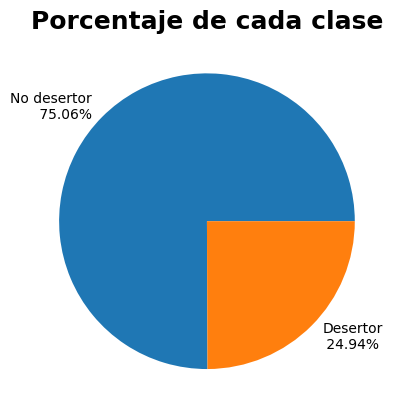

In [159]:
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data_modelo[data_modelo.desertor == 0.0].shape[0],
                   data_modelo[data_modelo.desertor == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'No desertor\n ' + labels[0]
labels[1] = 'Desertor\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()

In [116]:
data_modelo = data_modelo.drop(['COMUNA', 'CONDICION', 'ESTADO_CIVIL', 'NACIONALIDAD', 'NOMBRE_COLEGIO',
       'REGION', 'RUT_CON_DV', 'SEXO', 'TIPO COLEGIO', 'TIPO ESTUDIO',
       'ESTADO_FINAL_RAMO', 'FECHA_NACIMIENTO'], axis=1)

In [117]:
data_modelo.columns

Index(['AÑO_INGRESO', 'EGRESO_EM', 'PROMEDIO_LEM', 'EDAD_INGRESO', 'desertor',
       'CRR_CODIGO', 'ANO_ACADEMICO', 'DOM_SEMESTRE', 'C1', 'C2', 'C3',
       'NOTA_FINAL'],
      dtype='object')

In [118]:
# Determina los datos con los cuales se trabajará
features = data_modelo.drop(columns = ['desertor']).columns
X = data_modelo[features]
y = data_modelo.desertor

In [119]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29,
                                                    shuffle=True, stratify = y)

## Modelos base optimizando hiper parámetros

In [ ]:
target_names = ['No deserta', 'Deserta']

In [191]:
# Modelos base
models = {
    'Logistic Regression': LogisticRegression(max_iter=4000, class_weight="balanced"),
    'Support Vector Machine': SVC(kernel='linear', class_weight="balanced"),
    'KNN': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=29, class_weight="balanced"),
    'Random Forest': RandomForestClassifier(random_state=29, class_weight="balanced")
}

# Hiperparámetros a probar
param_grid = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Support Vector Machine': {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree Classifier': {
        'max_depth': [3, 5, 10, None],
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'criterion': ['gini', 'entropy']
    }
}

In [194]:
def obtiene_mejores_parametros(X_train, y_train, models, metrica : str = "balanced_accuracy"):
  """

  Args:
    X_train: data de entrenamiento
    y_train: etiquetas
    models: modelos a probar
    metrica: nombre de la mética a usar

  Returns: dos diccionarios: mejores parámetros y mejores scores

  """
  # Resultados
  best_params = {}
  best_scores = {}

  # Iterar sobre los modelos y sus hiperparámetros
  for model_name, model in models.items():
    print(f"Optimizando {model_name} usando {metrica}...")
    grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring=metrica, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_params[model_name] = grid.best_params_
    best_scores[model_name] = grid.best_score_
    print(f"Mejores parametros para {model_name}: {grid.best_params_}")
    print(f"Mejor cross-validated {metrica} para {model_name}: {grid.best_score_:.4f}\n")

  # Mostrar los mejores resultados
  print("Resumen de mejores modelos:")
  for model_name in best_params:
    print(f"{model_name}:")
    print(f"  Mejores Parámetros: {best_params[model_name]}")
    print(f"  Mejor CV {metrica}: {best_scores[model_name]:.4f}")

  return best_params, best_scores

In [218]:
def ver_matriz(matriz_x: np.array, target_names: np.array,
                     ax, title="Matriz de confusión") -> None:
    """Visualiza una matriz de confusión en un subplot en el ax indicado """
    clases = target_names
    group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten() / matriz_x.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(target_names), len(target_names))

    sns.heatmap(matriz_x, annot=labels, fmt='', cmap='Blues',
                xticklabels=clases, yticklabels=clases, ax=ax)

    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("PREDICCIÓN", fontsize=10)
    ax.set_ylabel("REAL", fontsize=10)

def metrics_by_matrix(matriz : np.ndarray):
    """ Retorna las métricas de clasificación desde la matriz de confusión """
    tn, fp, fn, tp = matriz.ravel()
    accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
    precision_manual = tp/(tp+fp)
    recall_manual = tp/(tp+fn)
    f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
    return accuracy_manual, precision_manual, recall_manual, f1_score_manual

def get_auc(real, prediccion):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion)
    return auc(fpr, tpr), tpr, fpr, thresholds

def false_positive_rate(cm):
    """Recibe una matriz de confusión y retorna la métrica de False Positive Rate"""
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)

def interpretaciones(recall_value : float, precision_value : float, accuracy_value : float, positive_text : str):
  """
  Se ofrecen interpretaciones menos genéricas y más orientadas al negocio de las métricas, se omite f1-score porque es una combinación de precision y recall
  """
  recall_interpretacion = f"Se han identificado el {recall_value*100:.2f}% de estudiantes {positive_text}"
  precision_interpretacion = f"Se han identificado un {precision_value*100:.2f}% de estudiantes {positive_text} y que realmente lo son"
  accuracy_interpretacion = f"El modelo acierta con un {accuracy_value*100:.2f}% de efectividad la deserción"
  return recall_interpretacion, precision_interpretacion, accuracy_interpretacion

In [195]:
best_params_accuracy, best_scores_accuracy = obtiene_mejores_parametros(X_train, y_train, models)
print(best_params_accuracy)
print(best_scores_accuracy)

Optimizando Logistic Regression usando balanced_accuracy...
Mejores parametros para Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Mejor cross-validated balanced_accuracy para Logistic Regression: 0.8425

Optimizando Support Vector Machine usando balanced_accuracy...
Mejores parametros para Support Vector Machine: {'C': 0.1, 'kernel': 'linear'}
Mejor cross-validated balanced_accuracy para Support Vector Machine: 0.8458

Optimizando KNN usando balanced_accuracy...
Mejores parametros para KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Mejor cross-validated balanced_accuracy para KNN: 0.9215

Optimizando Decision Tree Classifier usando balanced_accuracy...
Mejores parametros para Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
Mejor cross-validated balanced_accuracy para Decision Tree Classifier: 0.9692

Optimizando Random Forest usando balanced_accuracy...
Mejores parametros para Random Forest: {'criterion': 'entropy', 'max

In [196]:
best_params_precision, best_scores_precision = obtiene_mejores_parametros(X_train, y_train, models, "precision")
print(best_params_precision)
print(best_scores_precision)

Optimizando Logistic Regression usando precision...
Mejores parametros para Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Mejor cross-validated precision para Logistic Regression: 0.6225

Optimizando Support Vector Machine usando precision...
Mejores parametros para Support Vector Machine: {'C': 0.1, 'kernel': 'linear'}
Mejor cross-validated precision para Support Vector Machine: 0.6033

Optimizando KNN usando precision...
Mejores parametros para KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Mejor cross-validated precision para KNN: 0.9330

Optimizando Decision Tree Classifier usando precision...
Mejores parametros para Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
Mejor cross-validated precision para Decision Tree Classifier: 0.9654

Optimizando Random Forest usando precision...
Mejores parametros para Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
Mejor cross-validated precision para 

In [197]:
best_params_recall, best_scores_recall = obtiene_mejores_parametros(X_train, y_train, models, "recall")
print(best_params_recall)
print(best_scores_recall)

Optimizando Logistic Regression usando recall...
Mejores parametros para Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Mejor cross-validated recall para Logistic Regression: 0.8607

Optimizando Support Vector Machine usando recall...
Mejores parametros para Support Vector Machine: {'C': 1, 'kernel': 'linear'}
Mejor cross-validated recall para Support Vector Machine: 0.9034

Optimizando KNN usando recall...
Mejores parametros para KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Mejor cross-validated recall para KNN: 0.8649

Optimizando Decision Tree Classifier usando recall...
Mejores parametros para Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
Mejor cross-validated recall para Decision Tree Classifier: 0.9689

Optimizando Random Forest usando recall...
Mejores parametros para Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
Mejor cross-validated recall para Random Forest: 0.9614

Resumen d

In [198]:
best_params_f1, best_scores_f1 = obtiene_mejores_parametros(X_train, y_train, models, "f1")
print(best_params_f1)
print(best_scores_f1)

Optimizando Logistic Regression usando f1...
Mejores parametros para Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Mejor cross-validated f1 para Logistic Regression: 0.7203

Optimizando Support Vector Machine usando f1...
Mejores parametros para Support Vector Machine: {'C': 0.1, 'kernel': 'linear'}
Mejor cross-validated f1 para Support Vector Machine: 0.7169

Optimizando KNN usando f1...
Mejores parametros para KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Mejor cross-validated f1 para KNN: 0.8960

Optimizando Decision Tree Classifier usando f1...
Mejores parametros para Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
Mejor cross-validated f1 para Decision Tree Classifier: 0.9574

Optimizando Random Forest usando f1...
Mejores parametros para Random Forest: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}
Mejor cross-validated f1 para Random Forest: 0.9746

Resumen de mejores modelos:
Logistic Regress

In [199]:
best = {"accuracy" : best_scores_accuracy,
        "precision": best_scores_precision,
        "recall": best_scores_recall,
        "f1score": best_scores_f1}
best_parameters = {"accuracy" : best_params_accuracy,
        "precision": best_params_precision,
        "recall": best_params_recall,
        "f1score": best_params_f1
}
resultados = []
for metrica in ['accuracy', 'precision', 'recall', 'f1score']:
  filtered_items = [(key, value) for key, value in best[metrica].items() if value != 1]
  name_best_model, best_score = max(filtered_items, key=itemgetter(1))
  best_parameters_model = best_parameters[metrica][name_best_model]
  # Agrega el resultado
  resultados.append({"métrica" : metrica,
                     "nombre_modelo" : name_best_model,
                     "parámetros": best_parameters_model,
                     "score" : best_score})


In [200]:
pd.DataFrame(resultados)

,métrica,nombre_modelo,parámetros,score
0,accuracy,Random Forest,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.978771
1,precision,Random Forest,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.988386
2,recall,Decision Tree Classifier,"{'criterion': 'entropy', 'max_depth': 5, 'spli...",0.968854
3,f1score,Random Forest,"{'criterion': 'entropy', 'max_depth': None, 'n...",0.974601


#### Elección del mejor modelo usando el score más alto

In [ ]:
mejor_modelo = pd.DataFrame(resultados).loc[pd.DataFrame(resultados)['score'].idxmax()]

In [268]:
mejor_modelo.métrica

'precision'

In [203]:
mejor_modelo.parámetros

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}

In [271]:
mejor_modelo.score

0.9883861236802414

In [204]:
model_clf = RandomForestClassifier(random_state=29, class_weight="balanced",
                                   criterion = 'entropy', max_depth = 10, n_estimators= 200)
model_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=200, random_state=29)

In [ ]:
y_pred = model_clf.predict(X_test)

In [222]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  No deserta       1.00      0.99      1.00       195
     Deserta       0.98      1.00      0.99        65

    accuracy                           1.00       260
   macro avg       0.99      1.00      0.99       260
weighted avg       1.00      1.00      1.00       260



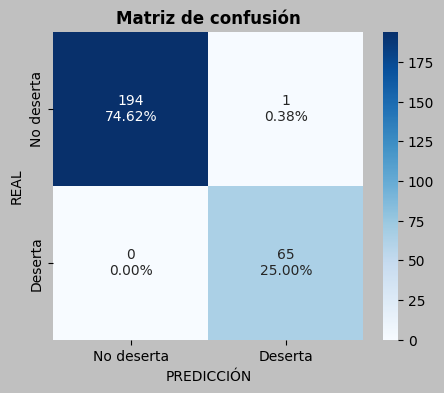

In [224]:
matriz = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 1, figsize=(5, 4), facecolor='silver')
ver_matriz(matriz, target_names, axes)

In [226]:
auc_r, tpr_r, fpr_r, thresholds_r = get_auc(y_test, y_pred)
print(f"AUC {auc_r}")
print(f"TPR {tpr_r}")
print(f"FPR {fpr_r}")
print(f"Thresholds {thresholds_r}")

AUC 0.9974358974358974
TPR [0. 1. 1.]
FPR [0.         0.00512821 1.        ]
Thresholds [inf  1.  0.]


In [235]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[-math.inf, 0.49], [0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, np.inf]]
rangos = pd.DataFrame(np.array(valores).reshape(5,-1),
            index = ['Muy Malo', 'Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

           Inferior  Superior
Muy Malo       -inf      0.49
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90       inf


In [236]:
# Función para encontrar el rango de un valor dado
def encontrar_rango(valor : float, rangos : pd.DataFrame) -> str:
    for rango, (inf, sup) in rangos.iterrows():
        if inf <= round(valor,2) <= sup:
            return rango
    return 'Fuera de rango'

In [237]:
encontrar_rango(valor=auc_r, rangos=rangos)

'Muy bueno'

In [253]:
from collections import Counter
print(Counter(y_pred))

Counter({False: 194, True: 66})


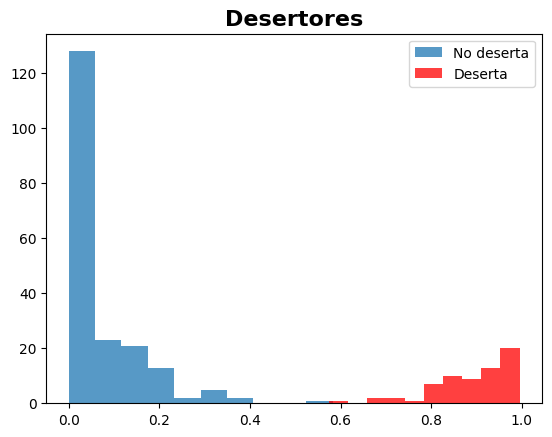

In [256]:
y_prob = model_clf.predict_proba (X_test) [ : , 1]

idx_0 = (y_test == 0)
idx_1 = (y_test == 1)

plt.hist (y_prob [idx_0], density = 0, alpha = 0.75, label = 'No deserta')
plt.hist (y_prob [idx_1], density = 0, facecolor = 'red', alpha = 0.75, label = 'Deserta')
plt.legend ()
plt.title ("Desertores", fontsize=16, fontweight="bold");

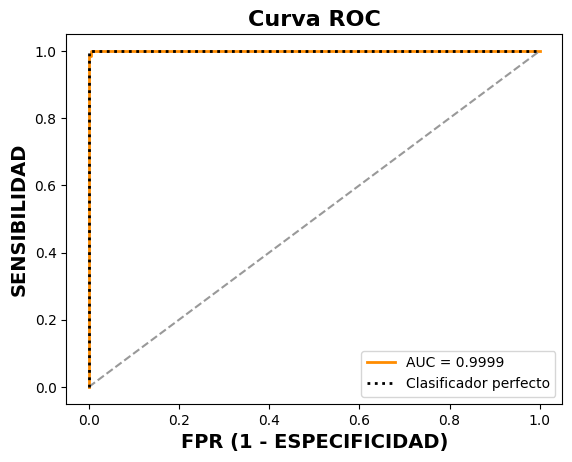

In [266]:
ejex, ejey, _ = roc_curve (y_test, y_prob)
roc_auc = auc (ejex, ejey)

plt.figure ()
plt.plot (ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.4f' % roc_auc)

plt.plot ([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot ([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':', color = 'black',
          label = 'Clasificador perfecto')

plt.xlim ([-0.05, 1.05])
plt.ylim ([-0.05, 1.05])

plt.xlabel ('FPR (1 - ESPECIFICIDAD)', fontsize=14, fontweight="bold")
plt.ylabel ('SENSIBILIDAD', fontsize=14, fontweight="bold")
plt.legend (loc = 'lower right')
plt.title("Curva ROC", fontsize=16, fontweight="bold")
plt.show ()

In [295]:
model_clf.feature_importances_

array([0.18741595, 0.15289144, 0.12595476, 0.12137933, 0.05087056,
       0.21581643, 0.00792511, 0.03129764, 0.02771459, 0.03374414,
       0.04499005])

In [296]:
model_clf.feature_names_in_

array(['AÑO_INGRESO', 'EGRESO_EM', 'PROMEDIO_LEM', 'EDAD_INGRESO',
       'CRR_CODIGO', 'ANO_ACADEMICO', 'DOM_SEMESTRE', 'C1', 'C2', 'C3',
       'NOTA_FINAL'], dtype=object)

   Caracteristica  Importancia
5   ANO_ACADEMICO     0.215816
0     AÑO_INGRESO     0.187416
1       EGRESO_EM     0.152891
2    PROMEDIO_LEM     0.125955
3    EDAD_INGRESO     0.121379
4      CRR_CODIGO     0.050871
10     NOTA_FINAL     0.044990
9              C3     0.033744
7              C1     0.031298
8              C2     0.027715


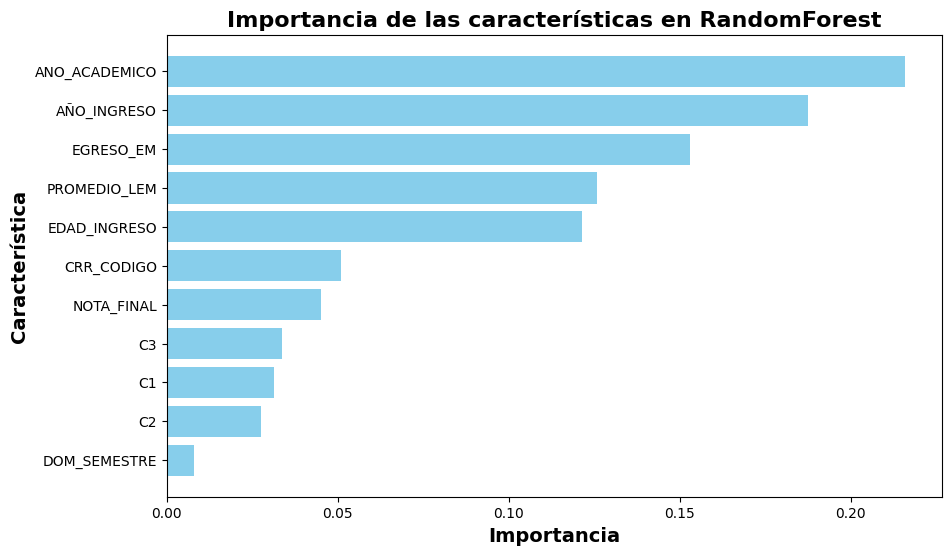

In [298]:
# Crear un DataFrame para facilitar el análisis
features_df = pd.DataFrame({
    'Caracteristica': X_train.columns,  # Nombres de las columnas
    'Importancia': model_clf.feature_importances_
})

# Ordenar las características por importancia (descendente)
features_df = features_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 características más importantes
print(features_df.head(10))

# Visualización de las importancias
plt.figure(figsize=(10, 6))
plt.barh(features_df['Caracteristica'], features_df['Importancia'], color='skyblue')
plt.xlabel('Importancia', fontsize=14, fontweight="bold")
plt.ylabel('Característica', fontsize=14, fontweight="bold")
plt.title('Importancia de las características en RandomForest',
          fontsize=16, fontweight="bold")
plt.gca().invert_yaxis()  # Invertir eje para mostrar la más importante arriba
plt.show()

In [250]:
data_para_excel = open("data_excel.txt", "w")
data_para_excel.write("id;score clasificación;clase real\n")
for indice in range(len(model_clf.predict_proba(X_test))):
  data_para_excel.write(str(indice+1) + ";" +
                        str(model_clf.predict_proba(X_test)[indice][1]) + ";" +
                        ("SI" if np.array(y_test)[indice] else "NO") + "\n")
data_para_excel.close()

### Elección del mejor modelo usando F1-Score dado que hay desbalance de clases

In [272]:
mejor_modelo_f1 = pd.DataFrame(resultados).query("métrica == 'f1score'")

In [274]:
print(mejor_modelo_f1.score)
print(mejor_modelo_f1.parámetros)
print(mejor_modelo_f1.nombre_modelo)

3    0.974601
Name: score, dtype: float64
3    {'criterion': 'entropy', 'max_depth': None, 'n...
Name: parámetros, dtype: object
3    Random Forest
Name: nombre_modelo, dtype: object


In [279]:
for parametro, valor in mejor_modelo_f1.parámetros.items():
  print(parametro, valor)

3 {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}


In [287]:
model_clf_f1 = RandomForestClassifier(random_state=29, class_weight="balanced",
                                   criterion = 'entropy', max_depth = None, n_estimators= 200)
model_clf_f1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=200, random_state=29)

In [288]:
y_pred_f1 = model_clf_f1.predict(X_test)

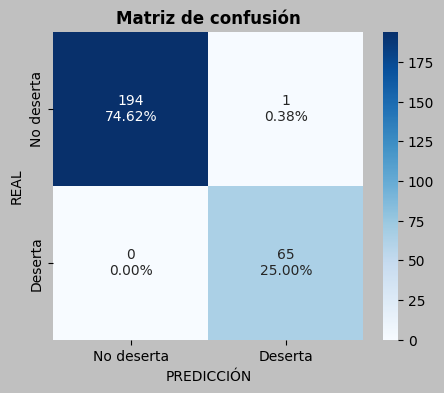

In [289]:
matriz = confusion_matrix(y_test, y_pred_f1)

fig, axes = plt.subplots(1, 1, figsize=(5, 4), facecolor='silver')
ver_matriz(matriz, target_names, axes)

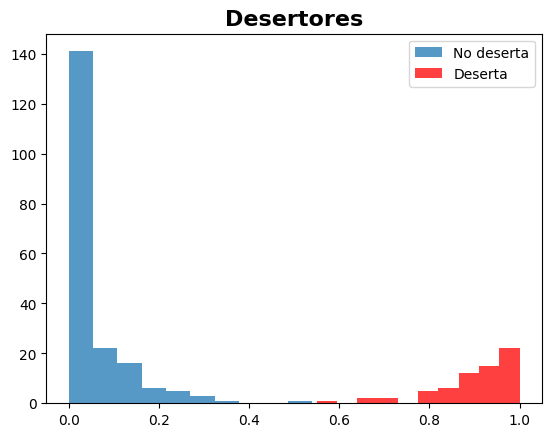

In [292]:
y_prob_f1 = model_clf_f1.predict_proba (X_test) [ : , 1]

idx_0 = (y_test == 0)
idx_1 = (y_test == 1)

plt.hist (y_prob_f1 [idx_0], density = 0, alpha = 0.75, label = 'No deserta')
plt.hist (y_prob_f1 [idx_1], density = 0, facecolor = 'red', alpha = 0.75, label = 'Deserta')
plt.legend ()
plt.title ("Desertores", fontsize=16, fontweight="bold");

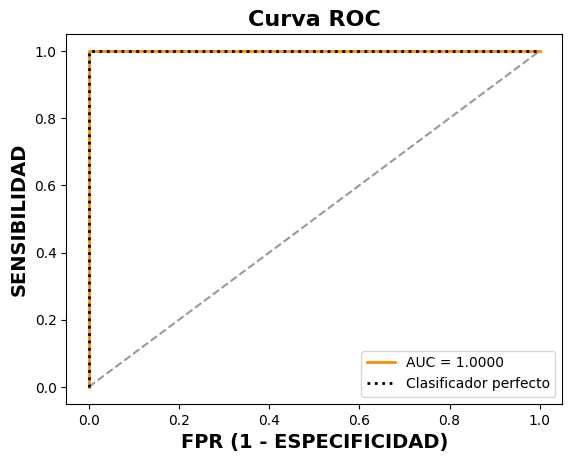

In [293]:
ejex, ejey, _ = roc_curve (y_test, y_prob_f1)
roc_auc = auc (ejex, ejey)

plt.figure ()
plt.plot (ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.4f' % roc_auc)

plt.plot ([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot ([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':', color = 'black',
          label = 'Clasificador perfecto')

plt.xlim ([-0.05, 1.05])
plt.ylim ([-0.05, 1.05])

plt.xlabel ('FPR (1 - ESPECIFICIDAD)', fontsize=14, fontweight="bold")
plt.ylabel ('SENSIBILIDAD', fontsize=14, fontweight="bold")
plt.legend (loc = 'lower right')
plt.title("Curva ROC", fontsize=16, fontweight="bold")
plt.show ()

In [294]:
print(classification_report(y_test, y_pred_f1))

              precision    recall  f1-score   support

       False       1.00      0.99      1.00       195
        True       0.98      1.00      0.99        65

    accuracy                           1.00       260
   macro avg       0.99      1.00      0.99       260
weighted avg       1.00      1.00      1.00       260



## Modelos base SIN optimización de hiper parámetros

In [149]:
# Diccionario para guardar los modelos entrenados
models = {
    'Logistic Regression': LogisticRegression(max_iter=4000),
    'Support Vector Machine' : SVC(kernel='linear'),
    'KNN' : KNeighborsClassifier(7),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=3, criterion = "entropy",
                                                       random_state=29),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=3,
                                            criterion = "entropy", random_state=29)
}

In [150]:
def generacion_modelos(models : dict, target_names : str,
                       X_train : pd.DataFrame, X_test : pd.DataFrame,
                       y_train : pd.Series, y_test : pd.Series):
  matrices = {}
  history = {}
  history_roc = {}
  history_report = {}
  for name, model in models.items():
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train, y_train)
    # Guardar el modelo entrenado en el diccionario
    y_pred = pipeline.predict(X_test)
    # Guarda matriz para poder visualizar después
    matrices[name] = confusion_matrix(y_test, y_pred)
    # Guarda el accuracy
    history[name] = accuracy_score(y_test, y_pred)
    # Guarda el roc_auc
    history_roc[name] = roc_auc_score(y_test, y_pred)
    history_report[name] = classification_report(y_test, y_pred, target_names=target_names)
  return matrices, history, history_roc, history_report

In [151]:
target_names = ['No deserta', 'Deserta']

In [152]:
# Generación de los modelos
matrices, history, history_roc, history_report = generacion_modelos(models, target_names,
                                                                    X_train, X_test,
                                                                    y_train, y_test)

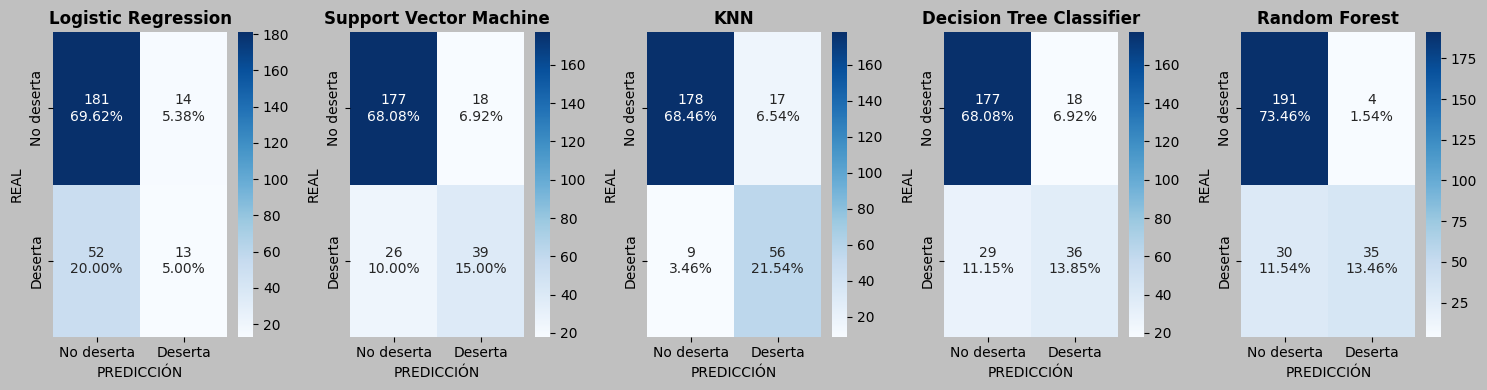

In [154]:
# Muestra las 5 matrices en un solo gráfico
fig, axes = plt.subplots(1, 5, figsize=(15, 4), facecolor='silver')

# Iterar sobre las matrices y mostrarlas en los subplots
for ax, (nombre_modelo, matriz) in zip(axes.flat, matrices.items()):
  ver_matriz(matriz, target_names, ax, title=nombre_modelo)

plt.tight_layout()
plt.show()

In [155]:
all_precision = {}
all_recall = {}
all_f1 = {}
# Obtiene las métricas a partir de la matriz de confusión
for modelo, matriz in matrices.items():
  accuracy_manual, precision_manual, recall_manual, f1_score_manual = metrics_by_matrix(matriz)
  print(f"\n** Métricas desde la matriz de confusión de {modelo} **")
  print("\t{0:<15} = {1:.4f}".format("Precision",precision_manual))
  print("\t{0:<15} = {1:.4f}".format("Recall", recall_manual))
  print("\t{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual))
  print("\t{0:<15} = {1:.4f}".format("Accuracy ", accuracy_manual))
  print(f"\n** Interpretaciones de métricas de {modelo} **")
  r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual, precision_manual, accuracy_manual,"desertar")
  print("\t", r_interpretacion, "\n\t", p_interpretacion, "\n\t", a_interpretacion)
  all_precision[modelo] = precision_manual
  all_recall[modelo] = recall_manual
  all_f1[modelo] = f1_score_manual


** Métricas desde la matriz de confusión de Logistic Regression **
	Precision       = 0.4815
	Recall          = 0.2000
	F1-score        = 0.2826
	Accuracy        = 0.7462

** Interpretaciones de métricas de Logistic Regression **
	 Se han identificado el 20.00% de estudiantes desertar 
	 Se han identificado un 48.15% de estudiantes desertar y que realmente lo son 
	 El modelo acierta con un 74.62% de efectividad la deserción

** Métricas desde la matriz de confusión de Support Vector Machine **
	Precision       = 0.6842
	Recall          = 0.6000
	F1-score        = 0.6393
	Accuracy        = 0.8308

** Interpretaciones de métricas de Support Vector Machine **
	 Se han identificado el 60.00% de estudiantes desertar 
	 Se han identificado un 68.42% de estudiantes desertar y que realmente lo son 
	 El modelo acierta con un 83.08% de efectividad la deserción

** Métricas desde la matriz de confusión de KNN **
	Precision       = 0.7671
	Recall          = 0.8615
	F1-score        = 0.8116
	Acc

### Análisis de métricas

In [138]:
def get_bestModel(history : dict, models : dict):
  """ Retorna el mejor modelo y el mejor score considerando el history entregado """
  # Filtrar elementos donde el valor sea diferente de 1
  filtered_items = [(key, value) for key, value in history.items() if value != 1]
  name_best_model, best_score = max(filtered_items, key=itemgetter(1))
  best_model = models[name_best_model]
  return name_best_model, best_score, best_model

#### Accuracy

In [139]:
# Visualiza como una tabla
pd.DataFrame.from_dict(history, orient='index', columns=['Accuracy']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
Accuracy,0.746154,0.830769,0.9,0.819231,1.0


In [140]:
name_best_model, best_score, best_model = get_bestModel(history, models)
print(f"Considerando 'accuracy' el mejor modelo es {name_best_model} con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'accuracy' el mejor modelo es KNN con un score de 0.9000
--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=7)
Entrenado con 
	['AÑO_INGRESO' 'EGRESO_EM' 'PROMEDIO_LEM' 'EDAD_INGRESO' 'CRR_CODIGO'
 'ANO_ACADEMICO' 'DOM_SEMESTRE' 'C1' 'C2' 'C3' 'NOTA_FINAL']


#### Precision

In [143]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_precision, orient='index', columns=['precision']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
precision,0.481481,0.684211,0.767123,0.666667,1.0


In [144]:
name_best_model, best_score, best_model = get_bestModel(all_precision, models)
print(f"Considerando 'precision' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")

print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'precision' el mejor modelo es 'KNN' con un score de 0.7671
--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=7)
Entrenado con 
	['AÑO_INGRESO' 'EGRESO_EM' 'PROMEDIO_LEM' 'EDAD_INGRESO' 'CRR_CODIGO'
 'ANO_ACADEMICO' 'DOM_SEMESTRE' 'C1' 'C2' 'C3' 'NOTA_FINAL']


#### Recall

In [145]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_recall, orient='index', columns=['Recall']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
Recall,0.2,0.6,0.861538,0.553846,1.0


In [146]:
name_best_model, best_score, best_model = get_bestModel(all_recall, models)
print(f"Considerando 'recall' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'recall' el mejor modelo es 'KNN' con un score de 0.8615
--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=7)
Entrenado con 
	['AÑO_INGRESO' 'EGRESO_EM' 'PROMEDIO_LEM' 'EDAD_INGRESO' 'CRR_CODIGO'
 'ANO_ACADEMICO' 'DOM_SEMESTRE' 'C1' 'C2' 'C3' 'NOTA_FINAL']


#### F1-score

In [147]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_f1, orient='index', columns=['F1 score']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
F1 score,0.282609,0.639344,0.811594,0.605042,1.0


In [148]:
name_best_model, best_score, best_model = get_bestModel(all_f1, models)
print(f"Considerando 'F1 score' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'F1 score' el mejor modelo es 'KNN' con un score de 0.8116
--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=7)
Entrenado con 
	['AÑO_INGRESO' 'EGRESO_EM' 'PROMEDIO_LEM' 'EDAD_INGRESO' 'CRR_CODIGO'
 'ANO_ACADEMICO' 'DOM_SEMESTRE' 'C1' 'C2' 'C3' 'NOTA_FINAL']


#### ROC_AUC

In [141]:
# Visualiza como una tabla
pd.DataFrame.from_dict(history_roc, orient='index', columns=['ROC_AUC']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
ROC_AUC,0.564103,0.753846,0.887179,0.730769,1.0


In [142]:
name_best_model, best_score, best_model = get_bestModel(history_roc, models)
print(f"Considerando 'ROC AUC' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'ROC AUC' el mejor modelo es 'KNN' con un score de 0.8872
--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=7)
Entrenado con 
	['AÑO_INGRESO' 'EGRESO_EM' 'PROMEDIO_LEM' 'EDAD_INGRESO' 'CRR_CODIGO'
 'ANO_ACADEMICO' 'DOM_SEMESTRE' 'C1' 'C2' 'C3' 'NOTA_FINAL']
